# Data Cleaning for Actor Classification Project 

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_imgs/suriya1.jpg')
img.shape

(674, 674, 3)

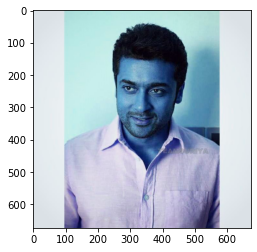

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(674, 674)

In [5]:
gray

array([[226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       ...,
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226]], dtype=uint8)

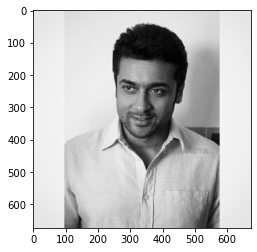

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[221, 151, 245, 245]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(221, 151, 245, 245)

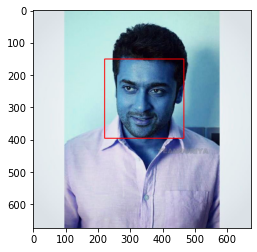

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

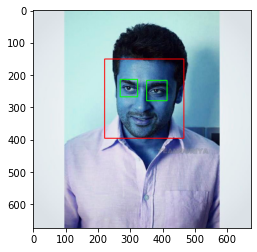

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

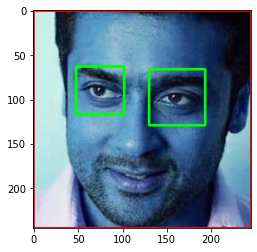

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

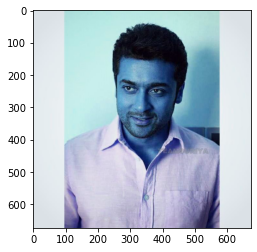

In [13]:
original_image = cv2.imread('./test_imgs/suriya1.jpg')
plt.imshow(original_image)

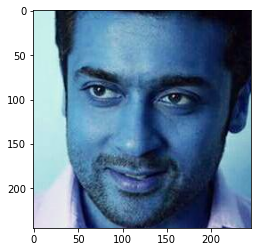

In [14]:

cropped_image = get_cropped_image_if_2_eyes('./test_imgs/suriya1.jpg')

plt.imshow(cropped_image)

(674, 674, 3)


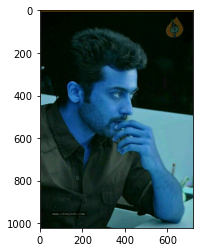

In [15]:
org_image_obstructed = cv2.imread('./test_imgs/suriya3.JPG')
plt.imshow(org_image_obstructed)
print(img.shape)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_imgs/suriya3.JPG')
cropped_image_no_2_eyes

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/akshay_kumar',
 './dataset/allu_arjun',
 './dataset/nani',
 './dataset/srk',
 './dataset/suriya']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".PNG"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

akshay_kumar
allu_arjun
nani
Generating cropped images in folder:  ./dataset/cropped/nani
srk
Generating cropped images in folder:  ./dataset/cropped/srk
suriya
Generating cropped images in folder:  ./dataset/cropped/suriya
